In [1]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle


In [2]:
# --- 1. Load the single channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)
signal = trials[0]['input_features'][0, :]  # shape: (n_samples,)
print("Signal shape:", signal.shape)
print("First 10 values:", signal[:10])


Signal shape: (125, 1651)
First 10 values: [[ 5.30065878e-07 -3.47526229e-06 -1.43179015e-05 ...  5.84699858e-06
   5.93834369e-06  3.04116091e-06]
 [-1.26559862e-06 -5.96290951e-06 -1.69424614e-05 ...  7.18812368e-06
   7.76067529e-06  7.02401731e-06]
 [-2.19220770e-06 -5.33733887e-06 -1.29303273e-05 ...  7.85813078e-06
   7.98616272e-06  8.77828325e-06]
 ...
 [-2.64502776e-06 -3.53961228e-06 -3.43448287e-06 ...  6.01213708e-06
   5.32062255e-06  6.98587760e-06]
 [-2.24822690e-06 -5.56444292e-06 -1.16772398e-05 ...  6.99836662e-06
   7.45522952e-06  8.52237043e-06]
 [-1.39328380e-06 -4.04344834e-06 -7.92663790e-06 ...  6.60175880e-06
   7.25598611e-06  8.30564181e-06]]


In [3]:
trials

[{'text': '附近还有其他的酒店吗',
  'input_features': array([[[ 5.30065878e-07, -3.47526229e-06, -1.43179015e-05, ...,
            5.84699858e-06,  5.93834369e-06,  3.04116091e-06],
          [-1.26559862e-06, -5.96290951e-06, -1.69424614e-05, ...,
            7.18812368e-06,  7.76067529e-06,  7.02401731e-06],
          [-2.19220770e-06, -5.33733887e-06, -1.29303273e-05, ...,
            7.85813078e-06,  7.98616272e-06,  8.77828325e-06],
          ...,
          [ 1.12241135e+01,  1.28185125e+01,  1.02679686e+01, ...,
            9.86863717e+00,  8.70528029e+00,  1.01315025e+01],
          [ 4.06786445e-01,  2.11791730e+00, -4.83385829e-01, ...,
            4.03051644e-01,  3.17394475e-01,  8.80691933e-01],
          [ 6.52800000e+04,  6.52800000e+04,  6.52800000e+04, ...,
            6.52800000e+04,  6.52800000e+04,  6.52800000e+04]]],
        shape=(1, 125, 1651))},
 {'text': '我们只有没有淋浴的房间',
  'input_features': array([[[-2.43919820e-06,  4.75168718e-07, -8.87805388e-06, ...,
           -1.59640

In [4]:
# --- 2. Define Parameters ---
sfreq = 500
wavelet_name = 'morl'


In [21]:
# 20 linearly spaced bands: 0-5, 5-10, ..., 95-100 Hz
band_edges = np.linspace(0, 100, 25)
bands_25 = [(band_edges[i], band_edges[i+1]) for i in range(24)]
freqs = np.linspace(0, 100, 100)[1:]  # skip 0 Hz to avoid division by zero
scales = pywt.central_frequency(wavelet_name) * sfreq / freqs


In [22]:
print("Band edges:", band_edges)
print("Bands_25:", bands_25[:3], "...")  # print first 3 bands for brevity
print("Freqs shape:", freqs.shape)
print("Scales shape:", scales.shape)


Band edges: [  0.           4.16666667   8.33333333  12.5         16.66666667
  20.83333333  25.          29.16666667  33.33333333  37.5
  41.66666667  45.83333333  50.          54.16666667  58.33333333
  62.5         66.66666667  70.83333333  75.          79.16666667
  83.33333333  87.5         91.66666667  95.83333333 100.        ]
Bands_25: [(np.float64(0.0), np.float64(4.166666666666667)), (np.float64(4.166666666666667), np.float64(8.333333333333334)), (np.float64(8.333333333333334), np.float64(12.5))] ...
Freqs shape: (99,)
Scales shape: (99,)


In [25]:
bands_25

[(np.float64(0.0), np.float64(4.166666666666667)),
 (np.float64(4.166666666666667), np.float64(8.333333333333334)),
 (np.float64(8.333333333333334), np.float64(12.5)),
 (np.float64(12.5), np.float64(16.666666666666668)),
 (np.float64(16.666666666666668), np.float64(20.833333333333336)),
 (np.float64(20.833333333333336), np.float64(25.0)),
 (np.float64(25.0), np.float64(29.166666666666668)),
 (np.float64(29.166666666666668), np.float64(33.333333333333336)),
 (np.float64(33.333333333333336), np.float64(37.5)),
 (np.float64(37.5), np.float64(41.66666666666667)),
 (np.float64(41.66666666666667), np.float64(45.833333333333336)),
 (np.float64(45.833333333333336), np.float64(50.0)),
 (np.float64(50.0), np.float64(54.16666666666667)),
 (np.float64(54.16666666666667), np.float64(58.333333333333336)),
 (np.float64(58.333333333333336), np.float64(62.50000000000001)),
 (np.float64(62.50000000000001), np.float64(66.66666666666667)),
 (np.float64(66.66666666666667), np.float64(70.83333333333334)),
 

In [24]:
scales

array([402.1875    , 201.09375   , 134.0625    , 100.546875  ,
        80.4375    ,  67.03125   ,  57.45535714,  50.2734375 ,
        44.6875    ,  40.21875   ,  36.5625    ,  33.515625  ,
        30.9375    ,  28.72767857,  26.8125    ,  25.13671875,
        23.65808824,  22.34375   ,  21.16776316,  20.109375  ,
        19.15178571,  18.28125   ,  17.48641304,  16.7578125 ,
        16.0875    ,  15.46875   ,  14.89583333,  14.36383929,
        13.86853448,  13.40625   ,  12.97379032,  12.56835938,
        12.1875    ,  11.82904412,  11.49107143,  11.171875  ,
        10.86993243,  10.58388158,  10.3125    ,  10.0546875 ,
         9.80945122,   9.57589286,   9.35319767,   9.140625  ,
         8.9375    ,   8.74320652,   8.55718085,   8.37890625,
         8.20790816,   8.04375   ,   7.88602941,   7.734375  ,
         7.5884434 ,   7.44791667,   7.3125    ,   7.18191964,
         7.05592105,   6.93426724,   6.81673729,   6.703125  ,
         6.5932377 ,   6.48689516,   6.38392857,   6.28

In [20]:
freqs

array([  1.02020202,   2.04040404,   3.06060606,   4.08080808,
         5.1010101 ,   6.12121212,   7.14141414,   8.16161616,
         9.18181818,  10.2020202 ,  11.22222222,  12.24242424,
        13.26262626,  14.28282828,  15.3030303 ,  16.32323232,
        17.34343434,  18.36363636,  19.38383838,  20.4040404 ,
        21.42424242,  22.44444444,  23.46464646,  24.48484848,
        25.50505051,  26.52525253,  27.54545455,  28.56565657,
        29.58585859,  30.60606061,  31.62626263,  32.64646465,
        33.66666667,  34.68686869,  35.70707071,  36.72727273,
        37.74747475,  38.76767677,  39.78787879,  40.80808081,
        41.82828283,  42.84848485,  43.86868687,  44.88888889,
        45.90909091,  46.92929293,  47.94949495,  48.96969697,
        49.98989899,  51.01010101,  52.03030303,  53.05050505,
        54.07070707,  55.09090909,  56.11111111,  57.13131313,
        58.15151515,  59.17171717,  60.19191919,  61.21212121,
        62.23232323,  63.25252525,  64.27272727,  65.29

In [26]:
# --- 3. Perform CWT ---
coeffs, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coeffs shape:", coeffs.shape)  # (n_scales, n_samples)
print("Frequencies shape:", frequencies.shape)
print("First 10 frequencies:", frequencies[:10])


CWT coeffs shape: (99, 125, 1651)
Frequencies shape: (99,)
First 10 frequencies: [ 1.01010101  2.02020202  3.03030303  4.04040404  5.05050505  6.06060606
  7.07070707  8.08080808  9.09090909 10.1010101 ]


In [27]:
coeffs

array([[[ 5.11178287e-05,  5.03977410e-05,  3.23216078e-05, ...,
         -2.60052636e-05, -2.50083735e-05, -2.18733102e-05],
        [ 2.25210191e-05,  2.20709274e-05,  1.03099929e-05, ...,
          1.61992863e-06,  2.17735460e-06,  5.30560503e-06],
        [ 6.59009598e-07,  9.79631379e-07, -7.48690866e-06, ...,
          1.99751656e-05,  1.89374462e-05,  2.13343878e-05],
        ...,
        [ 2.02677425e+01,  1.80764632e+01,  1.73301139e+01, ...,
         -3.35358544e+00, -3.88533850e+00, -6.38448141e+00],
        [ 6.41782601e+00,  5.65181532e+00,  7.28398511e+00, ...,
          9.50976750e+00,  8.34023104e+00,  6.03666052e+00],
        [ 4.28759031e+01,  4.28759031e+01,  4.28759031e+01, ...,
          4.28759031e+01,  4.28759031e+01,  4.28759031e+01]],

       [[-2.01700919e-05, -1.61472483e-05, -2.16908971e-05, ...,
          8.42616706e-06, -1.35772812e-06,  9.38605637e-06],
        [-1.82610799e-05, -1.56009581e-05, -2.04767407e-05, ...,
          5.81846298e-06,  1.72224042e

In [28]:
coeffs, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print(coeffs.shape)      # (number of scales, number of time points)
print(frequencies.shape) # (number of scales,)

(99, 125, 1651)
(99,)


In [38]:
coeffs.shape

(99, 125, 1651)

In [36]:
np.abs(coeffs).shape

(99, 125, 1651)

In [29]:
np.angle(coeffs)

array([[[0.        , 0.        , 0.        , ..., 3.14159265,
         3.14159265, 3.14159265],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 3.14159265, ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 3.14159265,
         3.14159265, 3.14159265],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[3.14159265, 3.14159265, 3.14159265, ..., 0.        ,
         3.14159265, 0.        ],
        [3.14159265, 3.14159265, 3.14159265, ..., 0.        ,
         0.        , 0.        ],
        [3.14159265, 3.14159265, 3.14159265, ..., 3.14159265,
         3.14159265, 0.        ],
        ...,
        [3.14159265, 3.14159265, 3.14159265, ..., 0.        ,
         0.        , 3.14159265],
        [3.1

In [31]:
# Real part
real_part = coeffs.real
print("Real part shape:", real_part.shape)
print("First 5 real values at first frequency:", real_part[0, :5])

# Imaginary part
imag_part = coeffs.imag
print("Imaginary part shape:", imag_part.shape)
print("First 5 imag values at first frequency:", imag_part[0, :5])

Real part shape: (99, 125, 1651)
First 5 real values at first frequency: [[ 5.11178287e-05  5.03977410e-05  3.23216078e-05 ... -2.60052636e-05
  -2.50083735e-05 -2.18733102e-05]
 [ 2.25210191e-05  2.20709274e-05  1.03099929e-05 ...  1.61992863e-06
   2.17735460e-06  5.30560503e-06]
 [ 6.59009598e-07  9.79631379e-07 -7.48690866e-06 ...  1.99751656e-05
   1.89374462e-05  2.13343878e-05]
 [ 8.58910963e-06  7.61881243e-06  1.12623022e-06 ...  8.92725496e-06
   6.04999414e-06  5.90932694e-06]
 [ 1.63708155e-05  1.83017346e-05  1.15198850e-05 ... -8.34898752e-06
  -1.42886618e-05 -1.50277014e-05]]
Imaginary part shape: (99, 125, 1651)
First 5 imag values at first frequency: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [32]:
imag_part

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [33]:
# --- 4. Extract 20 bands (complex) ---
band_coeffs_25 = []
for i, (fmin, fmax) in enumerate(bands_25):
    idx = np.where((frequencies >= fmin) & (frequencies < fmax))[0]
    if len(idx) > 0:
        mean_band = np.mean(coeffs[idx, :], axis=0)
        band_coeffs_25.append(mean_band)
        print(f"Band {i}: {fmin}-{fmax} Hz, used {len(idx)} freq indices, mean_band shape: {mean_band.shape}")
    else:
        band_coeffs_25.append(np.zeros(signal.shape, dtype=np.complex64))
        print(f"Band {i}: {fmin}-{fmax} Hz, no freq indices, filled with zeros.")
band_coeffs_25 = np.stack(band_coeffs_25, axis=0)  # (25, n_samples)
print("band_coeffs_25 shape:", band_coeffs_25.shape)


Band 0: 0.0-4.166666666666667 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 1: 4.166666666666667-8.333333333333334 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 2: 8.333333333333334-12.5 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 3: 12.5-16.666666666666668 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 4: 16.666666666666668-20.833333333333336 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 5: 20.833333333333336-25.0 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 6: 25.0-29.166666666666668 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 7: 29.166666666666668-33.333333333333336 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 8: 33.333333333333336-37.5 Hz, used 5 freq indices, mean_band shape: (125, 1651)
Band 9: 37.5-41.66666666666667 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band 10: 41.66666666666667-45.833333333333336 Hz, used 4 freq indices, mean_band shape: (125, 1651)
Band

In [34]:
# --- 5. Group into 5 bands as specified (complex) ---
five_bands_complex = [
    band_coeffs_25[0],                # delta: 0-5 Hz
    band_coeffs_25[1],                # theta: 5-10 Hz
    band_coeffs_25[2],                # alpha: 10-15 Hz
    np.mean(band_coeffs_25[3:7], 0),  # beta: 15-35 Hz (bands 3-6)
    np.mean(band_coeffs_25[7:25], 0)  # gamma: 35-100 Hz (bands 7-19)
]
band_names = ['Delta (0-5 Hz)', 'Theta (5-10 Hz)', 'Alpha (10-15 Hz)', 'Beta (15-35 Hz)', 'Gamma (35-100 Hz)']

for i, band in enumerate(five_bands_complex):
    print(f"{band_names[i]}: shape {band.shape}, first 5 real values: {band.real[:5]}")


Delta (0-5 Hz): shape (125, 1651), first 5 real values: [[ 3.31777497e-06  4.06628305e-06 -9.31186591e-07 ... -4.14258980e-06
  -8.91683526e-06 -4.38214958e-06]
 [-1.43944250e-06 -1.24227182e-06 -4.53719336e-06 ...  6.45587339e-06
   3.61383756e-06  7.16037699e-06]
 [-4.92657978e-06 -4.77567960e-06 -7.07205761e-06 ...  1.30484568e-05
   1.13642024e-05  1.35989142e-05]
 [-8.00088630e-07 -6.64213174e-07 -3.20406140e-06 ...  1.20699950e-05
   1.11754535e-05  1.20821311e-05]
 [ 8.44531181e-07  1.47963236e-06 -3.41028807e-07 ...  2.38173244e-06
  -6.04267731e-07  8.48532339e-07]]
Theta (5-10 Hz): shape (125, 1651), first 5 real values: [[-8.48824777e-06 -7.47106315e-06 -6.23636284e-06 ...  7.40413445e-06
   7.26826726e-06  7.88021667e-06]
 [-1.19139323e-05 -1.14569787e-05 -1.05699082e-05 ...  1.12813500e-05
   1.01697721e-05  9.50016441e-06]
 [-1.11996654e-05 -1.14256309e-05 -1.08410558e-05 ...  1.17070773e-05
   9.91838390e-06  8.40509220e-06]
 [-4.68691947e-06 -5.42852663e-06 -4.95015330e

In [46]:
band_edges = np.arange(0, 101, 4)
print("Band edges for sub-bands:", band_edges)
sub_band_powers = []
for i in range(len(band_edges) - 1):
    fmin, fmax = band_edges[i], band_edges[i+1]
    print(f"Processing sub-band {i}: {fmin}-{fmax} Hz")
    # Use the actual frequencies from the CWT
    freq_indices = np.where((frequencies >= fmin) & (frequencies <= fmax))[0]
    print(f"Frequency indices for {fmin}-{fmax} Hz: {freq_indices}")
    if len(freq_indices) > 0:
        print(f"Number of frequencies in this sub-band: {len(freq_indices)}")
        mean_power = np.mean(coeffs[freq_indices, :], axis=0)
        print(f"Mean power shape for {fmin}-{fmax} Hz: {mean_power.shape}")
        print(mean_power)
        sub_band_powers.append(mean_power)
    else:
        sub_band_powers.append(np.zeros_like(signal))
    print(f"Sub-band {i} processed.\n")
print("Sub-band powers collected:", len(sub_band_powers))
sub_band_powers = np.array(sub_band_powers) # Shape: (number_of_bands, n_channels, n_samples)
print("Sub-band powers shape:", sub_band_powers.shape)

Band edges for sub-bands: [  0   4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68
  72  76  80  84  88  92  96 100]
Processing sub-band 0: 0-4 Hz
Frequency indices for 0-4 Hz: [0 1 2]
Number of frequencies in this sub-band: 3
Mean power shape for 0-4 Hz: (125, 1651)
[[ 9.38620863e-06  1.04603449e-05  3.04303092e-06 ... -3.68073100e-06
  -8.84851354e-06 -2.57381831e-06]
 [ 2.06038454e-06  2.13079183e-06 -2.70458843e-06 ...  6.11316544e-06
   3.10645237e-06  8.32094297e-06]
 [-3.16882883e-06 -3.30859361e-06 -6.72829951e-06 ...  1.13165610e-05
   9.62677601e-06  1.31455366e-05]
 ...
 [-1.42344812e+00 -2.17250924e+00 -1.09407097e+00 ... -5.70978547e+00
  -6.33810432e+00 -9.40515436e+00]
 [-1.36946982e+01 -1.45798657e+01 -1.32332372e+01 ... -2.21166488e+00
  -3.41322915e+00 -5.62613524e+00]
 [ 1.16739554e+01  3.94909215e+03  8.77142490e+03 ...  8.77666092e+03
   8.77666092e+03  1.69099800e+01]]
Sub-band 0 processed.

Processing sub-band 1: 4-8 Hz
Frequency indices for 4-8 H

In [47]:
band_edges

array([  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44,  48,
        52,  56,  60,  64,  68,  72,  76,  80,  84,  88,  92,  96, 100])

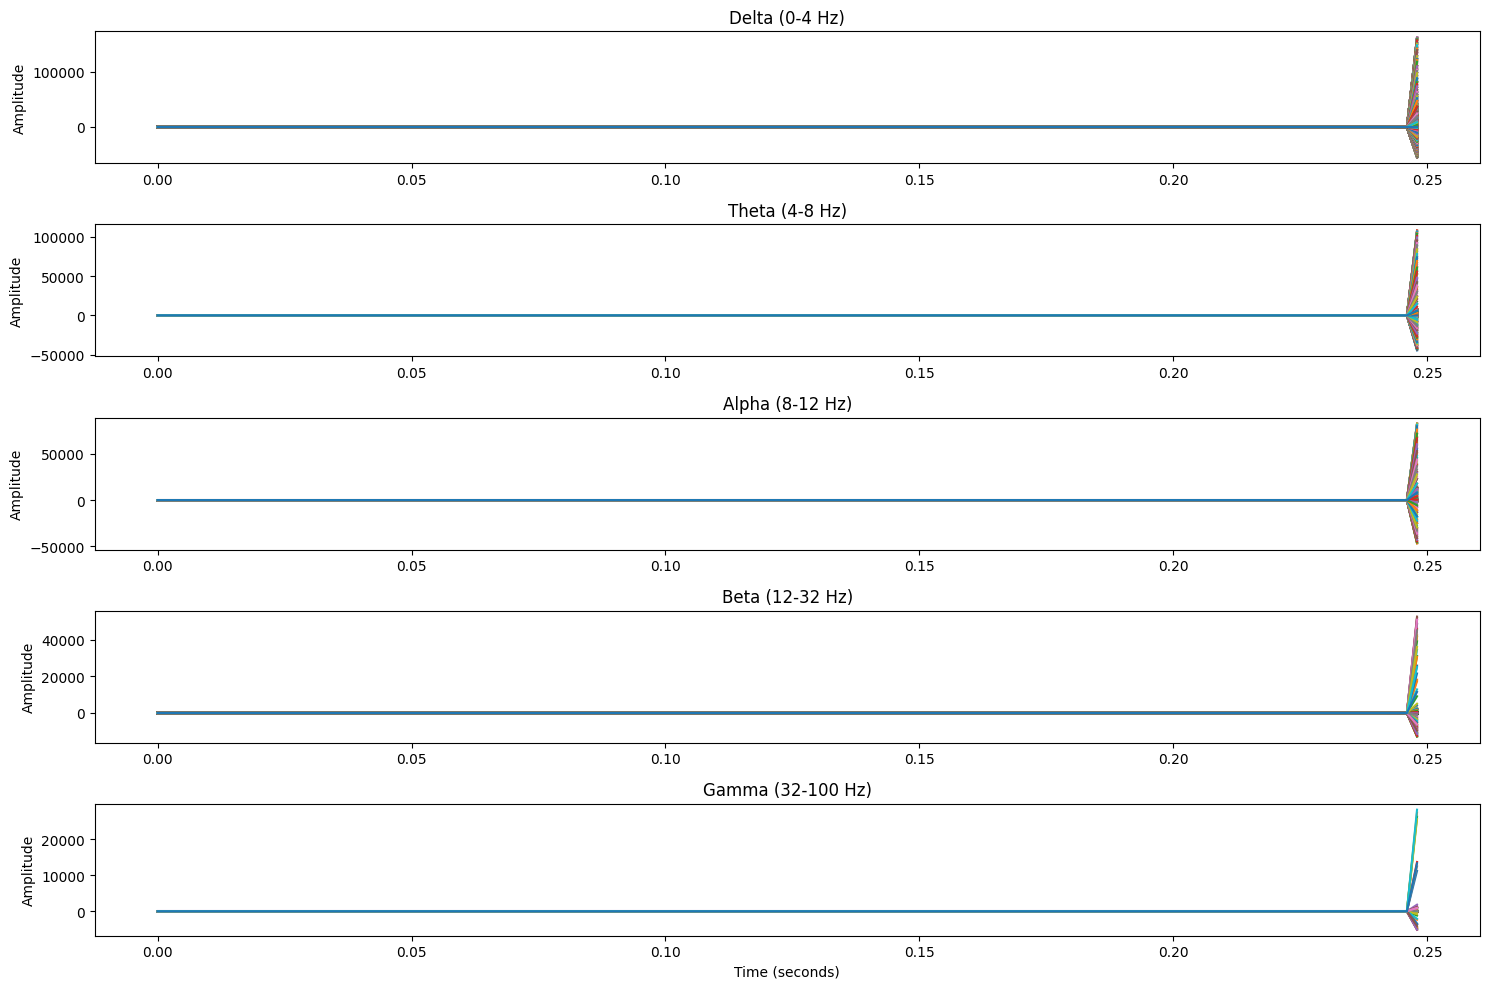

In [45]:
# Group sub-bands into 5 main bands (using the same logic as before)
# delta: sub-band 0 (0-4 Hz)
# theta: sub-band 1 (4-8 Hz)
# alpha: sub-band 2 (8-12 Hz)
# beta: mean of sub-bands 3-7 (12-32 Hz)
# gamma: mean of sub-bands 8-24 (32-100 Hz)

delta = sub_band_powers[0]
theta = sub_band_powers[1]
alpha = sub_band_powers[2]
beta = np.mean(sub_band_powers[3:8], axis=0)
gamma = np.mean(sub_band_powers[8:], axis=0)

band_signals = [delta, theta, alpha, beta, gamma]
band_names = ['Delta (0-4 Hz)', 'Theta (4-8 Hz)', 'Alpha (8-12 Hz)', 'Beta (12-32 Hz)', 'Gamma (32-100 Hz)']

# Plot each band: time vs amplitude
time_axis = np.arange(len(signal)) / sfreq
plt.figure(figsize=(15, 10))
for i, (band, name) in enumerate(zip(band_signals, band_names)):
    plt.subplot(5, 1, i+1)
    plt.plot(time_axis, band.real if np.iscomplexobj(band) else band)
    plt.title(name)
    plt.ylabel('Amplitude')
    if i == 4:
        plt.xlabel('Time (seconds)')
plt.tight_layout()
plt.show()

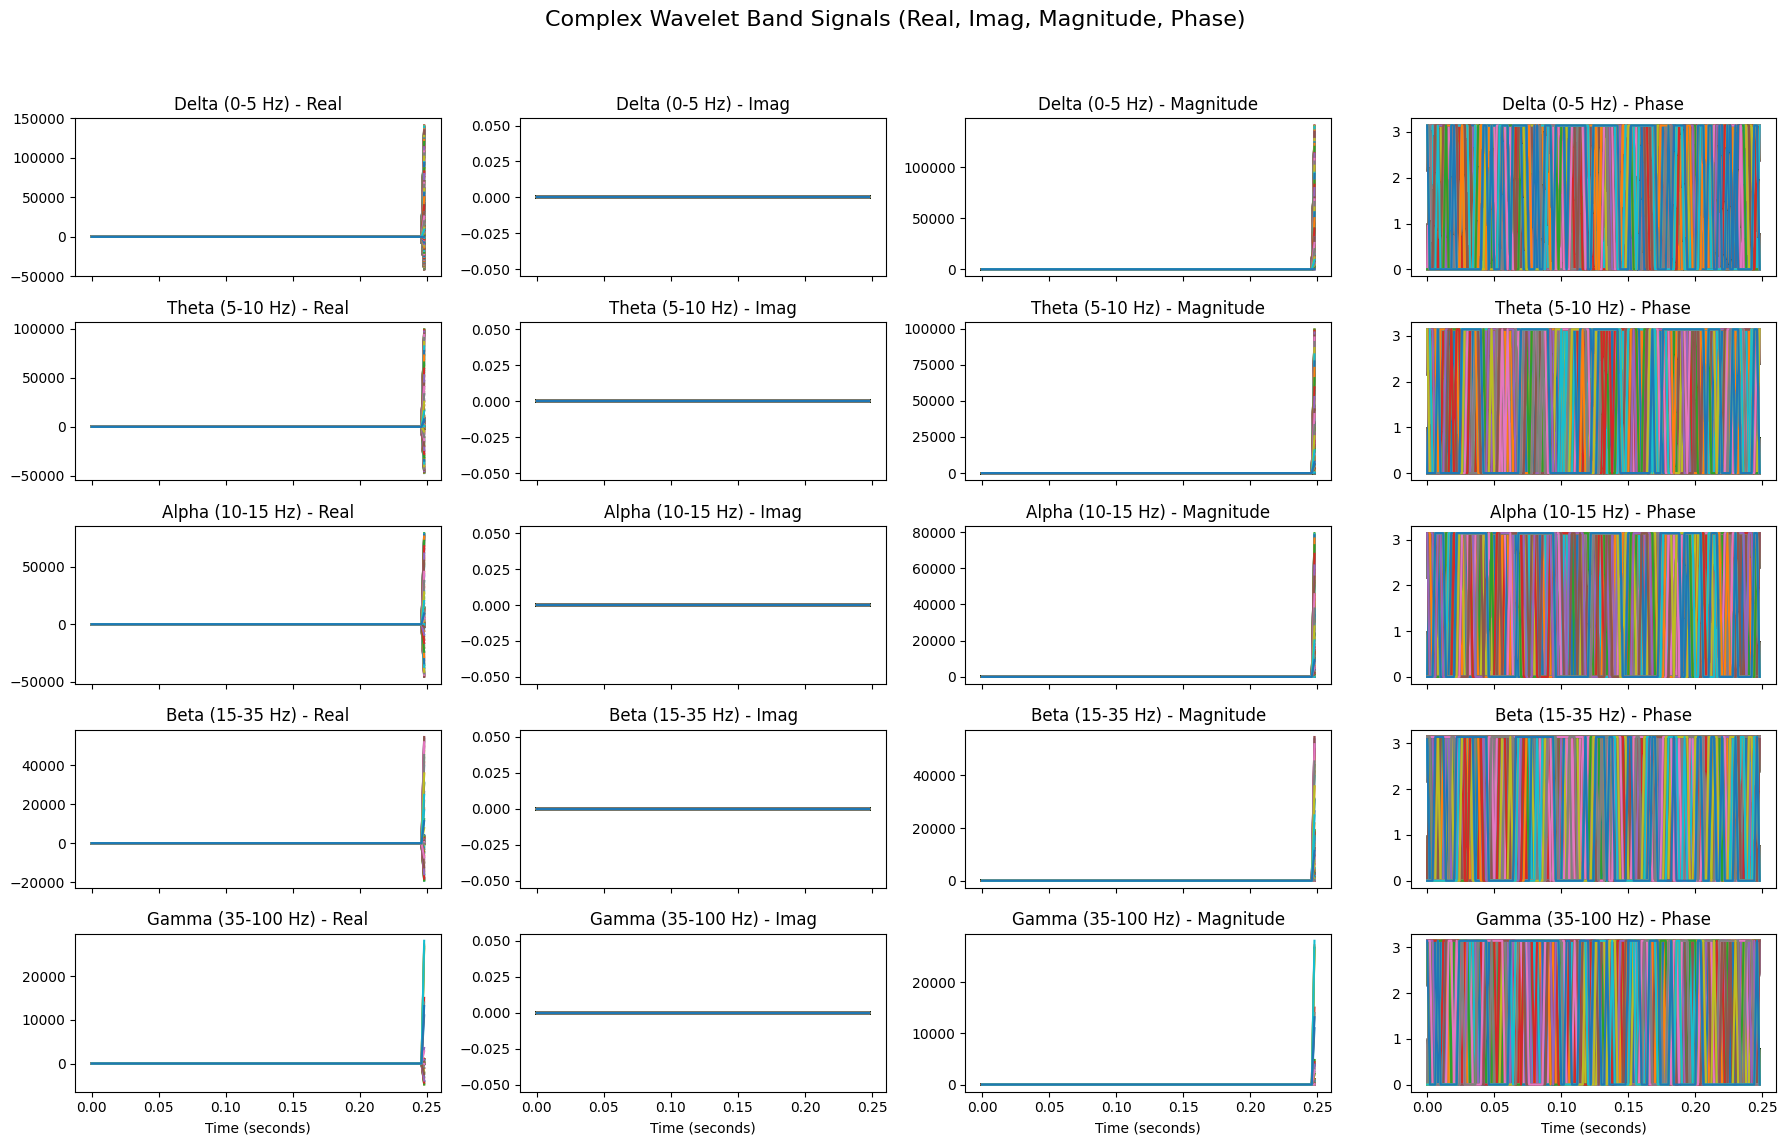

In [35]:
# --- 6. Visualization: Real, Imag, Magnitude, Phase for each band ---
time_axis = np.arange(len(signal)) / sfreq
fig, axes = plt.subplots(5, 4, figsize=(18, 12), sharex=True)
fig.suptitle('Complex Wavelet Band Signals (Real, Imag, Magnitude, Phase)', fontsize=16)

for i, (band, name) in enumerate(zip(five_bands_complex, band_names)):
    axes[i, 0].plot(time_axis, band.real)
    axes[i, 0].set_title(f"{name} - Real")
    axes[i, 1].plot(time_axis, band.imag)
    axes[i, 1].set_title(f"{name} - Imag")
    axes[i, 2].plot(time_axis, np.abs(band))
    axes[i, 2].set_title(f"{name} - Magnitude")
    axes[i, 3].plot(time_axis, np.angle(band))
    axes[i, 3].set_title(f"{name} - Phase")
    if i == 4:
        for j in range(4):
            axes[i, j].set_xlabel('Time (seconds)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [124]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-03_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)
signal_matrix = trials[0]['input_features']  # shape: (n_channels, n_samples)
print("Signal matrix shape:", signal_matrix.shape)


Signal matrix shape: (1, 125, 1651)


In [125]:
signal_matrix = signal_matrix[0, :]  # Use the first channel for demonstration
print("First channel signal shape:", signal_matrix.shape)

First channel signal shape: (125, 1651)


In [126]:
signal = signal_matrix[0]  # shape: (n_samples,)

In [127]:
signal

array([-7.33639112e-06, -9.99054473e-06, -9.74634025e-06, ...,
       -9.01525372e-06, -6.23626891e-06, -7.48953930e-06], shape=(1651,))

Selected channel: 0, Signal shape: (1651,)
CWT coeffs shape: (100, 1651)


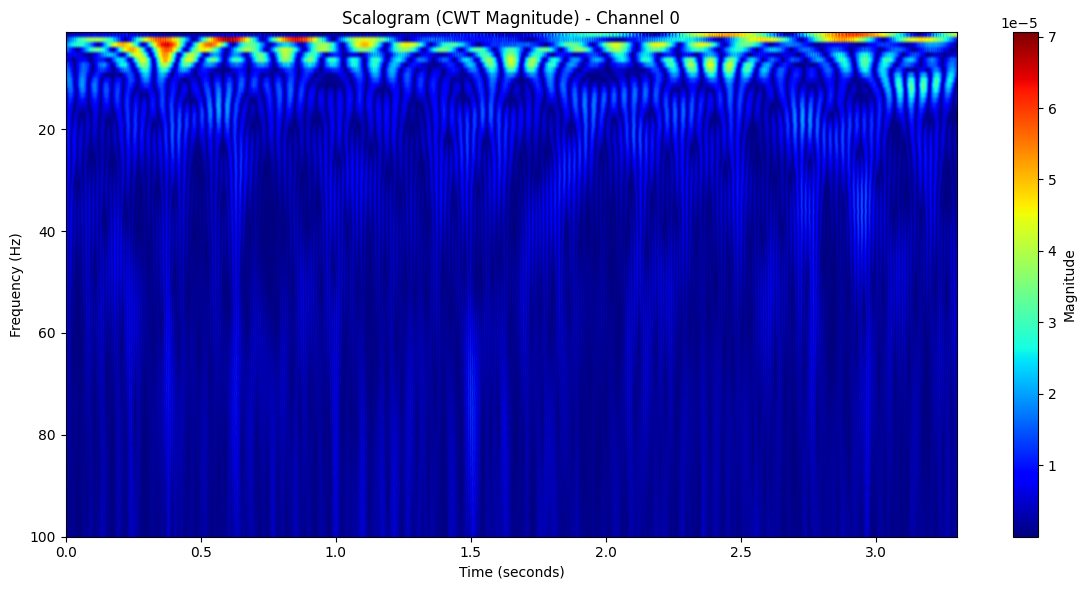

In [128]:
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# import pickle

# # --- 1. Load the multi-channel signal ---
# pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
# with open(pkl_path, "rb") as f:
#     trials = pickle.load(f)
# signal_matrix = trials[0]['input_features']  # shape: (n_channels, n_samples)
# print("Signal matrix shape:", signal_matrix)

# --- 2. Select a single channel ---
channel_idx = 0  # Change this to plot a different channel
# signal = signal_matrix[channel_idx, :]  # shape: (n_samples,)
print(f"Selected channel: {channel_idx}, Signal shape: {signal.shape}")

# --- 3. Define Parameters ---
sfreq = 500
wavelet_name = 'morl'

# --- 4. Define scales and compute CWT ---
freqs = np.linspace(1, 100, 100)  # 1 to 100 Hz
scales = pywt.central_frequency(wavelet_name) * sfreq / freqs
coeffs, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coeffs shape:", coeffs.shape)  # (n_freqs, n_samples)

# --- 5. Plot the scalogram ---
plt.figure(figsize=(12, 6))
plt.imshow(
    np.abs(coeffs),
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]],
    aspect='auto', cmap='jet', origin='upper'
)
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram (CWT Magnitude) - Channel {channel_idx}')
plt.tight_layout()
plt.show()

In [164]:
trials

[{'text': '放毛巾堵门下',
  'input_features': array([[[ 1.02725898e-05,  1.14227417e-05,  1.02008671e-05, ...,
           -8.08354064e-06, -2.32087498e-06,  3.00797074e-06],
          [ 9.08136907e-06,  1.02394954e-05,  8.71430395e-06, ...,
           -8.44078917e-06, -4.49941642e-06,  1.20038353e-06],
          [ 9.14170387e-06,  1.02000360e-05,  8.71990615e-06, ...,
           -8.00394838e-06, -4.28642211e-06,  2.22373874e-06],
          ...,
          [-1.10322722e+01, -1.04261070e+01, -1.05816593e+01, ...,
           -4.85245106e+00, -5.10838377e+00, -5.04838699e+00],
          [-5.81748053e+00, -5.05192047e+00, -5.57897911e+00, ...,
            9.57474990e+00,  1.01572710e+01,  9.86601956e+00],
          [ 6.52800000e+04,  6.52800000e+04,  6.52800000e+04, ...,
            6.52800000e+04,  6.52800000e+04,  6.52800000e+04]]],
        shape=(1, 125, 1651))},
 {'text': '房间里的开关使用',
  'input_features': array([[[-1.21299484e-06,  1.21426317e-06,  2.50186716e-06, ...,
           -5.07407545e-08

Selected channel: 0, Signal shape: (1651,)
CWT coeffs shape: (100, 1651)


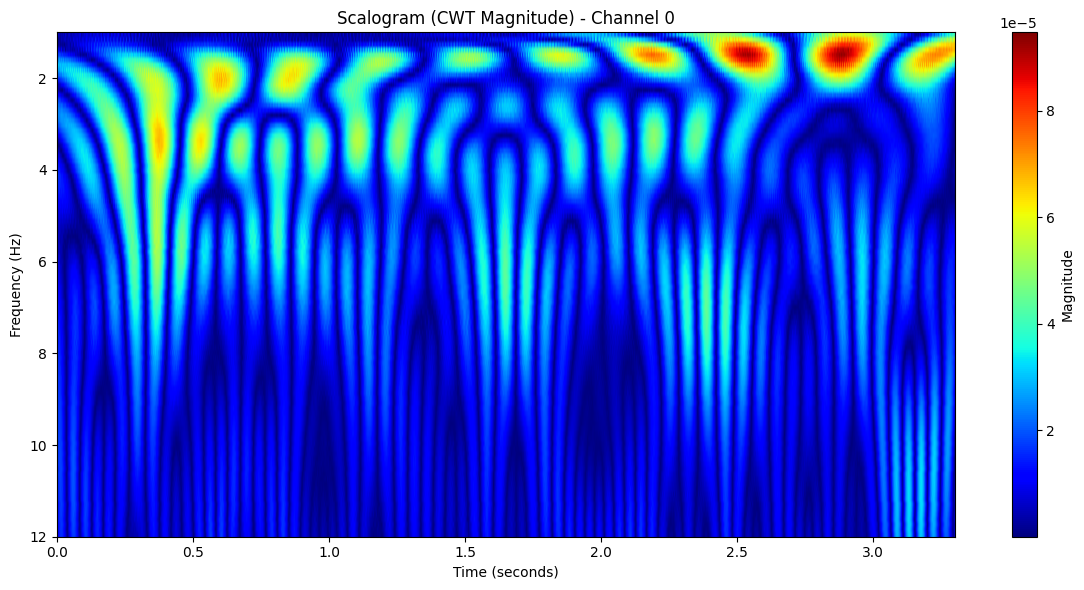

In [132]:
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# import pickle

# # --- 1. Load the multi-channel signal ---
# pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
# with open(pkl_path, "rb") as f:
#     trials = pickle.load(f)
# signal_matrix = trials[0]['input_features']  # shape: (n_channels, n_samples)
# print("Signal matrix shape:", signal_matrix)

# --- 2. Select a single channel ---
channel_idx = 0  # Change this to plot a different channel
# signal = signal_matrix[channel_idx, :]  # shape: (n_samples,)
print(f"Selected channel: {channel_idx}, Signal shape: {signal.shape}")

# --- 3. Define Parameters ---
sfreq = 500
wavelet_name = 'morl'

# --- 4. Define scales and compute CWT ---
freqs = np.linspace(1, 12, 100)  # 1 to 100 Hz
scales = pywt.central_frequency(wavelet_name) * sfreq / freqs
coeffs, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coeffs shape:", coeffs.shape)  # (n_freqs, n_samples)

# --- 5. Plot the scalogram ---
plt.figure(figsize=(12, 6))
plt.imshow(
    np.abs(coeffs),
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]],
    aspect='auto', cmap='jet', origin='upper'
)
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram (CWT Magnitude) - Channel {channel_idx}')
plt.tight_layout()
plt.show()

Selected channel: 0, Signal shape: (1651,)
CWT coeffs shape: (100, 1651)


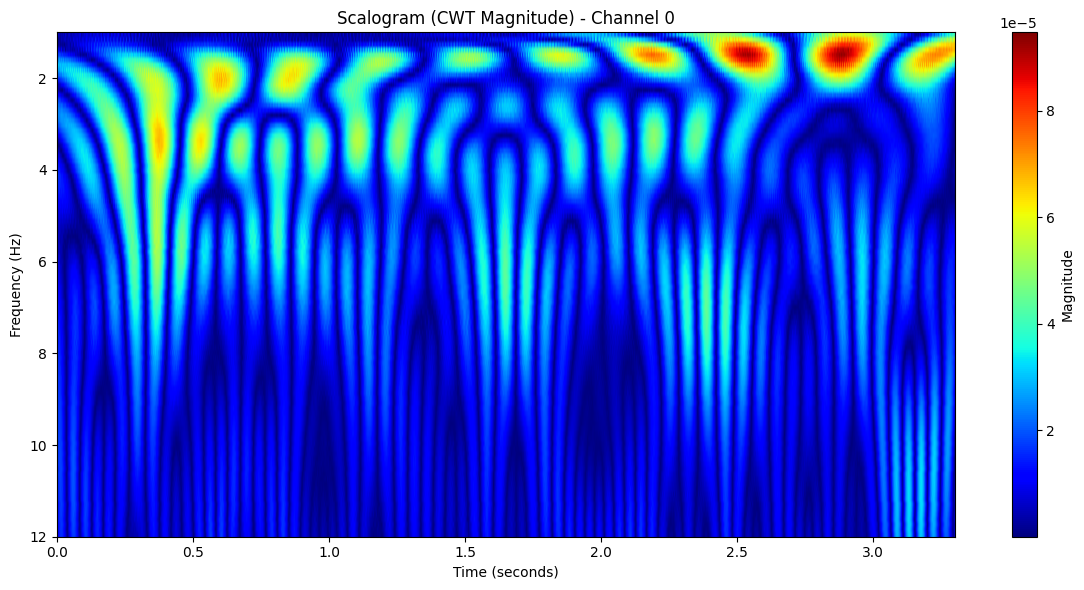

In [131]:
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# import pickle

# # --- 1. Load the multi-channel signal ---
# pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
# with open(pkl_path, "rb") as f:
#     trials = pickle.load(f)
# signal_matrix = trials[0]['input_features']  # shape: (n_channels, n_samples)
# print("Signal matrix shape:", signal_matrix)

# --- 2. Select a single channel ---
channel_idx = 0  # Change this to plot a different channel
# signal = signal_matrix[channel_idx, :]  # shape: (n_samples,)
print(f"Selected channel: {channel_idx}, Signal shape: {signal.shape}")

# --- 3. Define Parameters ---
sfreq = 500
wavelet_name = 'morl'

# --- 4. Define scales and compute CWT ---
freqs = np.linspace(1, 12, 100)  # 1 to 12 Hz
scales = pywt.central_frequency(wavelet_name) * sfreq / freqs
coeffs, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coeffs shape:", coeffs.shape)  # (n_freqs, n_samples)

# --- 5. Plot the scalogram ---
plt.figure(figsize=(12, 6))
plt.imshow(
    np.abs(coeffs),
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]],
    aspect='auto', cmap='jet', origin='upper'
)
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram (CWT Magnitude) - Channel {channel_idx}')
plt.tight_layout()
plt.show()

In [53]:
trials[0]['input_features']

array([[[ 5.30065878e-07, -3.47526229e-06, -1.43179015e-05, ...,
          5.84699858e-06,  5.93834369e-06,  3.04116091e-06],
        [-1.26559862e-06, -5.96290951e-06, -1.69424614e-05, ...,
          7.18812368e-06,  7.76067529e-06,  7.02401731e-06],
        [-2.19220770e-06, -5.33733887e-06, -1.29303273e-05, ...,
          7.85813078e-06,  7.98616272e-06,  8.77828325e-06],
        ...,
        [ 1.12241135e+01,  1.28185125e+01,  1.02679686e+01, ...,
          9.86863717e+00,  8.70528029e+00,  1.01315025e+01],
        [ 4.06786445e-01,  2.11791730e+00, -4.83385829e-01, ...,
          4.03051644e-01,  3.17394475e-01,  8.80691933e-01],
        [ 6.52800000e+04,  6.52800000e+04,  6.52800000e+04, ...,
          6.52800000e+04,  6.52800000e+04,  6.52800000e+04]]],
      shape=(1, 125, 1651))

In [216]:
# ...existing code...
import torch
from wavelets_5bands import WaveletTransform5Channel
from eegcnn5bands import EEGcnn, PositionalEncoding
import torch.nn as nn

# --- 1. Load a single trial ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-03_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)
signal = trials[0]['input_features'][0:122, :]  # shape: (122, 1651)
signal = torch.tensor(signal, dtype=torch.float32).unsqueeze(0)  # (1, 122, 1651)

In [217]:
signal.shape

torch.Size([1, 1, 125, 1651])

In [218]:
signal = signal.squeeze(0)  # or signal = signal[0]

In [219]:
signal.shape

torch.Size([1, 125, 1651])

In [220]:
# --- 2. Wavelet Transform (5 bands) ---
wavelet = WaveletTransform5Channel()
with torch.no_grad():
    bands = wavelet(signal)  # (1, 5, 122, 1651)
print("Wavelet output shape:", bands.shape)


Wavelet output shape: torch.Size([1, 5, 125, 1651])


In [250]:

# --- 3. EEGNet (CNN) ---
eegnet = EEGcnn(Chans=122, kernLength1=20, kernLength2=10, F1=8, D=2, F2=16, P1=2, P2=5, dropoutRate=0.5, in_channels=5)
with torch.no_grad():
    cnn_out = eegnet(bands)  # (1, F2, T)
print("EEGNet output shape:", cnn_out.shape)

EEGNet output shape: torch.Size([1, 16, 4, 165])


In [251]:
cnn_out

tensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  1.1034e-01,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  0.0000e+00,  1.0026e-01,  ...,  0.0000e+00,
            0.0000e+00,  7.8298e-02],
          [ 0.0000e+00,  0.0000e+00,  6.3262e-02,  ...,  9.2696e-02,
            2.7270e-01, -3.4253e-02],
          [-0.0000e+00, -1.9979e+00, -6.4546e-01,  ..., -1.8527e+00,
           -0.0000e+00,  1.8559e-01]],

         [[ 0.0000e+00, -0.0000e+00,  7.7925e-03,  ...,  4.6353e-01,
            0.0000e+00,  1.2085e-01],
          [ 0.0000e+00,  0.0000e+00,  2.9395e-01,  ...,  9.5917e-02,
            0.0000e+00,  2.5614e-01],
          [ 2.2750e-01,  0.0000e+00,  0.0000e+00,  ...,  2.0909e-01,
            0.0000e+00,  0.0000e+00],
          [ 3.1759e+00, -0.0000e+00, -1.7864e+00,  ...,  5.9896e+00,
            0.0000e+00, -0.0000e+00]],

         [[-0.0000e+00, -3.1587e-01, -0.0000e+00,  ...,  3.2101e-01,
           -2.7289e-01, -2.5564e-01],
          [ 0.0000e+00, -6.9516e-

In [252]:
cnn_out = cnn_out.squeeze(2)  # Remove the 'height' dimension if it's 1

In [254]:
cnn_out = cnn_out.max(2).values  # shape: (1, F2, T)

In [255]:
cnn_out.shape

torch.Size([1, 16, 165])

Transformer output shape: torch.Size([1, 165, 16])


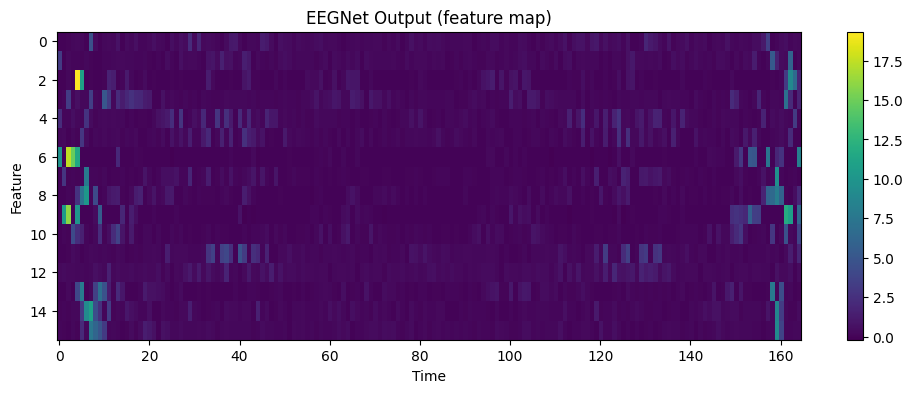

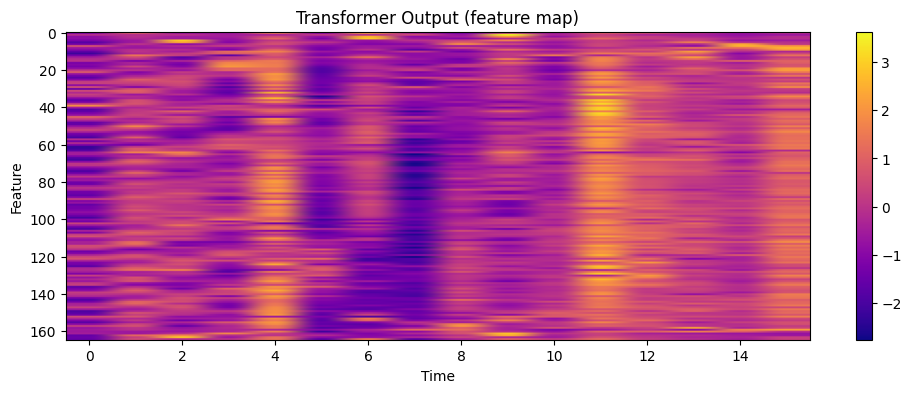

In [256]:




# --- 4. Transformer ---
# Prepare for transformer: (N, T, F2)
cnn_out_t = cnn_out.permute(0, 2, 1)  # (1, T, F2)
T, F2 = cnn_out_t.shape[1], cnn_out_t.shape[2]
posenc = PositionalEncoding(F2, dropout=0.1, max_len=T)
encoder_layer = nn.TransformerEncoderLayer(d_model=F2, nhead=max(1, F2//8), batch_first=True)
transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)
mask = torch.ones((1, T), dtype=torch.bool)  # No padding for this example

with torch.no_grad():
    cnn_out_t = posenc(cnn_out_t)
    transformer_out = transformer(cnn_out_t, src_key_padding_mask=~mask)
print("Transformer output shape:", transformer_out.shape)

# --- 5. Visualize ---
plt.figure(figsize=(12, 4))
plt.imshow(cnn_out[0].cpu().numpy(), aspect='auto', cmap='viridis')
plt.title("EEGNet Output (feature map)")
plt.xlabel("Time")
plt.ylabel("Feature")
plt.colorbar()
plt.show()

plt.figure(figsize=(12, 4))
plt.imshow(transformer_out[0].cpu().numpy(), aspect='auto', cmap='plasma')
plt.title("Transformer Output (feature map)")
plt.xlabel("Time")
plt.ylabel("Feature")
plt.colorbar()
plt.show()

In [261]:
model

EEGcnn(
  (block1): Sequential(
    (0): Conv2d(5, 8, kernel_size=(1, 20), stride=(1, 1), padding=same, bias=False)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Conv2d(8, 16, kernel_size=(122, 1), stride=(1, 1), groups=8, bias=False)
    (3): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): ELU(alpha=1.0)
    (5): AvgPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0)
    (6): Dropout(p=0.5, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(1, 10), stride=(1, 1), padding=same, groups=16, bias=False)
    (1): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ELU(alpha=1.0)
    (4): AvgPool2d(kernel_size=(1, 5), stride=(1, 5), padding=0)
    (5): Dropout(p=0.5, inplace=False)
  )
)

In [264]:
# --- 6. MLP after Transformer ---
import torch.nn as nn

# Suppose you want to pool the transformer output over time (mean pooling)
pooled = transformer_out.mean(dim=1)  # shape: (batch, features)
print("MLP input shape (after pooling):", pooled.shape)

# Define a simple MLP for classification (adjust num_classes as needed)
num_classes = 39
mlp = nn.Sequential(
    nn.Linear(F2, 64),
    nn.ReLU(),
    nn.Linear(64, num_classes)
)

# Forward pass through MLP
mlp_output = mlp(pooled)
print("MLP output shape:", mlp_output.shape)
print("MLP output (logits, first sample):", mlp_output[0])

MLP input shape (after pooling): torch.Size([1, 16])
MLP output shape: torch.Size([1, 39])
MLP output (logits, first sample): tensor([-0.6569,  0.4063,  0.1165,  0.0445,  0.1245,  0.2028, -0.0921, -0.2098,
         0.3265, -0.1873,  0.2265, -0.1124, -0.1260,  0.0859,  0.1225, -0.0553,
        -0.5016,  0.0971,  0.1619, -0.0999, -0.0783, -0.1364,  0.0855, -0.2593,
         0.4324, -0.1105, -0.1744,  0.1306,  0.1991, -0.0071, -0.1767, -0.0995,
         0.0943,  0.0129,  0.2352,  0.1119,  0.0784, -0.1313, -0.0971],
       grad_fn=<SelectBackward0>)


In [269]:
state = torch.load('/home/masuma/Desktop/Bisal_2314096/Chisco/checkpoint/checkpoint-31300.pt', map_location='cpu')
for k, v in state.items():
    print(k, v)

eegcnn.block1.0.weight tensor([[[[ 0.2183,  0.1696, -0.0824,  0.1310, -0.1030,  0.0036, -0.1372,
            0.0750,  0.1323, -0.1997,  0.1196, -0.0286,  0.0640, -0.0782,
            0.0085, -0.1008,  0.1091,  0.0431,  0.0080,  0.2728]]],


        [[[-0.2203, -0.0674, -0.0812,  0.1746, -0.0768,  0.0059,  0.0364,
           -0.0400,  0.0879, -0.1583,  0.1901, -0.1879,  0.1197,  0.0041,
           -0.0908,  0.0733, -0.0404,  0.0727, -0.0953, -0.2304]]],


        [[[ 0.2644,  0.0462,  0.0923,  0.1253,  0.0502, -0.1431,  0.0710,
            0.0196,  0.1206, -0.0774, -0.1471, -0.0373, -0.1434,  0.1436,
            0.0263,  0.0556,  0.0633,  0.0535,  0.2897,  0.0944]]],


        [[[-0.2061, -0.2655,  0.0046, -0.0906,  0.0625, -0.0388,  0.1809,
           -0.0971, -0.0904, -0.0973,  0.1940,  0.0853,  0.2519, -0.0802,
           -0.1173, -0.1201, -0.1550, -0.0146, -0.1302, -0.1389]]],


        [[[-0.2108, -0.1747,  0.0869, -0.0913,  0.1194, -0.0383,  0.1320,
           -0.1221, -0.0727,  0

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pickle

# --- 1. Load the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-02_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)
signal_matrix = trials[0]['input_features']  # shape: (n_channels, n_samples)
print("Signal matrix shape:", signal_matrix.shape)


Signal matrix shape: (1, 125, 1651)


In [163]:
trials

[{'text': '放毛巾堵门下',
  'input_features': array([[[ 1.02725898e-05,  1.14227417e-05,  1.02008671e-05, ...,
           -8.08354064e-06, -2.32087498e-06,  3.00797074e-06],
          [ 9.08136907e-06,  1.02394954e-05,  8.71430395e-06, ...,
           -8.44078917e-06, -4.49941642e-06,  1.20038353e-06],
          [ 9.14170387e-06,  1.02000360e-05,  8.71990615e-06, ...,
           -8.00394838e-06, -4.28642211e-06,  2.22373874e-06],
          ...,
          [-1.10322722e+01, -1.04261070e+01, -1.05816593e+01, ...,
           -4.85245106e+00, -5.10838377e+00, -5.04838699e+00],
          [-5.81748053e+00, -5.05192047e+00, -5.57897911e+00, ...,
            9.57474990e+00,  1.01572710e+01,  9.86601956e+00],
          [ 6.52800000e+04,  6.52800000e+04,  6.52800000e+04, ...,
            6.52800000e+04,  6.52800000e+04,  6.52800000e+04]]],
        shape=(1, 125, 1651))},
 {'text': '房间里的开关使用',
  'input_features': array([[[-1.21299484e-06,  1.21426317e-06,  2.50186716e-06, ...,
           -5.07407545e-08

In [159]:
signal_matrix = signal_matrix[0, :]  # Use the first channel for demonstration
print("First channel signal shape:", signal_matrix.shape)

First channel signal shape: (125, 1651)


In [1]:
signal = signal_matrix[0]  # shape: (n_samples,)

NameError: name 'signal_matrix' is not defined

In [ ]:
signal

NameError: name 'signal' is not defined

In [3]:
# import pywt
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# import pickle

# # --- 1. Load the multi-channel signal ---
# pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-01/sub-01_task-imagine_run-01_eeg.pkl")
# with open(pkl_path, "rb") as f:
#     trials = pickle.load(f)
# signal_matrix = trials[0]['input_features']  # shape: (n_channels, n_samples)
# print("Signal matrix shape:", signal_matrix)

# --- 2. Select a single channel ---
channel_idx = 0  # Change this to plot a different channel
# signal = signal_matrix[channel_idx, :]  # shape: (n_samples,)
print(f"Selected channel: {channel_idx}, Signal shape: {signal.shape}")

# --- 3. Define Parameters ---
sfreq = 500
wavelet_name = 'morl'

# --- 4. Define scales and compute CWT ---
freqs = np.linspace(1, 30, 30)  # 1 to 30 Hz
scales = pywt.central_frequency(wavelet_name) * sfreq / freqs
coeffs, frequencies = pywt.cwt(signal, scales, wavelet_name, sampling_period=1/sfreq)
print("CWT coeffs shape:", coeffs.shape)  # (n_freqs, n_samples)

# --- 5. Plot the scalogram ---
plt.figure(figsize=(12, 6))
plt.imshow(
    np.abs(coeffs),
    extent=[0, len(signal)/sfreq, frequencies[-1], frequencies[0]],
    aspect='auto', cmap='jet', origin='upper'
)
plt.colorbar(label='Magnitude')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (seconds)')
plt.title(f'Scalogram (CWT Magnitude) - Channel {channel_idx}')
plt.tight_layout()
plt.show()

NameError: name 'signal' is not defined

In [206]:


for i in range(43,1,-1):
    print(i)
    pkl_path = Path(f"Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-0{i}_eeg.pkl")
    with open(pkl_path, "rb") as f:
        trials = pickle.load(f)
    signal_matrix = trials[i]['input_features']
    print(trials[i]['text'])  # shape: (n_channels, n_samples)
    print("Signal matrix shape:", signal_matrix.shape)
    print("trials shape: " , len(trials)) 


43
过度晒太阳伤皮肤
Signal matrix shape: (1, 125, 1651)
trials shape:  142
42
你在写什么，约会邀请吗
Signal matrix shape: (1, 125, 1651)
trials shape:  85
41
因误认身份而被释放
Signal matrix shape: (1, 125, 1651)
trials shape:  91
40
春天的气息令人喜爱
Signal matrix shape: (1, 125, 1651)
trials shape:  72
39
你拖我进来干嘛
Signal matrix shape: (1, 125, 1651)
trials shape:  101
38
发型要求偏好中国风格
Signal matrix shape: (1, 125, 1651)
trials shape:  137
37
剪发不要剪太多
Signal matrix shape: (1, 125, 1651)
trials shape:  83
36
我明白了，先生
Signal matrix shape: (1, 125, 1651)
trials shape:  110
35
我们要换新家具
Signal matrix shape: (1, 125, 1651)
trials shape:  136
34
来吧，亲爱的
Signal matrix shape: (1, 125, 1651)
trials shape:  134
33
这地方不错，但需要些家具
Signal matrix shape: (1, 125, 1651)
trials shape:  136
32
我会立刻移车
Signal matrix shape: (1, 125, 1651)
trials shape:  141
31
奶奶做的浓汤好
Signal matrix shape: (1, 125, 1651)
trials shape:  134
30
这是纯金制作的
Signal matrix shape: (1, 125, 1651)
trials shape:  93
29
先生，来看看这里
Signal matrix shape: (1, 125, 1651)
trials shape:  104

In [205]:
# --- 1. Load the multi-channel signal ---
pkl_path = Path("Chisco/derivatives/preprocessed_pkl/sub-03/sub-03_task-imagine_run-015_eeg.pkl")
with open(pkl_path, "rb") as f:
    trials = pickle.load(f)
signal_matrix = trials[0]['input_features']  # shape: (n_channels, n_samples)
print("Signal matrix shape:", signal_matrix.shape)


Signal matrix shape: (1, 125, 1651)


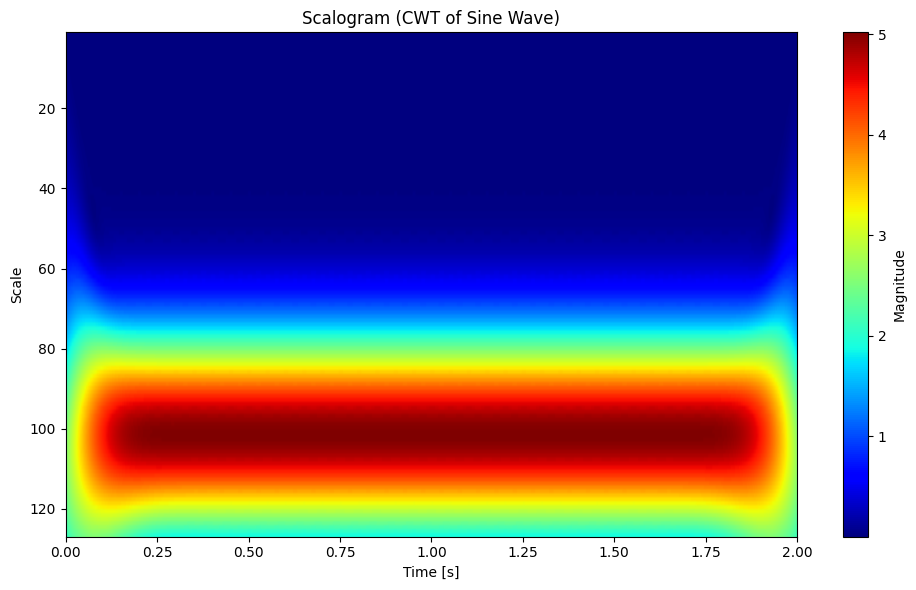

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 1. Generate a sine wave
fs = 1000  # Sampling frequency (Hz)
duration = 2  # seconds
t = np.linspace(0, duration, fs * duration, endpoint=False)
freq = 10  # Hz
signal = np.sin(2 * np.pi * freq * t)

# 2. Continuous Wavelet Transform (CWT)
wavelet = 'cmor1.5-1.0'  # Complex Morlet wavelet
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)

# 3. Plot the scalogram
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, duration, scales[-1], scales[0]],
           cmap='jet', aspect='auto')
plt.title("Scalogram (CWT of Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Scale")
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


In [55]:
scales

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127])

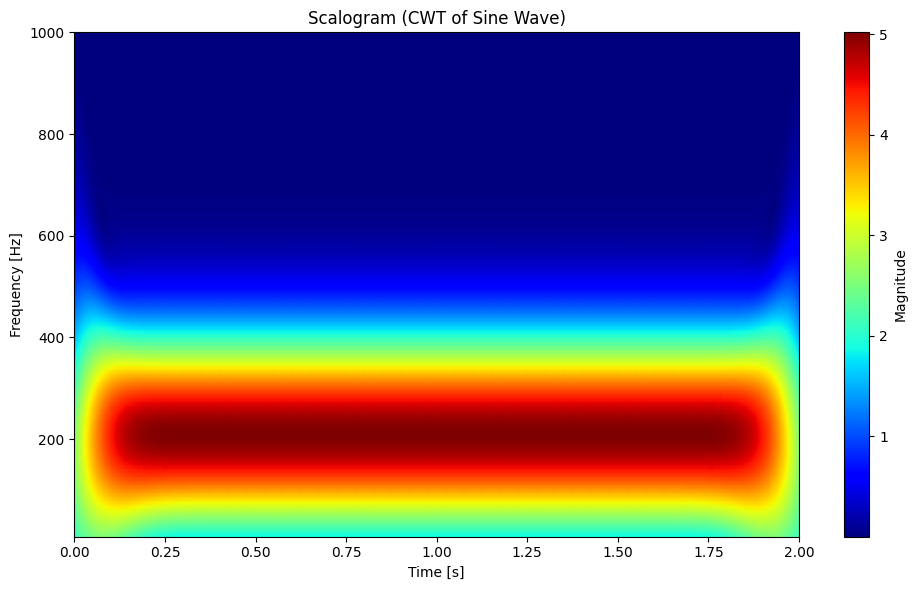

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 1. Generate a sine wave
fs = 1000  # Sampling frequency in Hz
duration = 2  # seconds
t = np.linspace(0, duration, fs * duration, endpoint=False)
freq = 10  # Hz
signal = np.sin(2 * np.pi * freq * t)

# 2. Continuous Wavelet Transform
wavelet = 'cmor1.5-1.0'
scales = np.arange(1, 128)
coefficients, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)

# 3. Plot frequency vs time
plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coefficients), extent=[0, duration, frequencies[-1], frequencies[0]],
           cmap='jet', aspect='auto')
plt.title("Scalogram (CWT of Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


In [63]:
np.abs(coefficients)


array([[2.68501918e-03, 7.40375881e-03, 9.66305170e-03, ...,
        9.74795053e-03, 9.85743837e-03, 9.66305432e-03],
       [3.39033579e-03, 3.39066910e-03, 2.30463095e-03, ...,
        3.45209844e-04, 1.07358417e-03, 2.30471762e-03],
       [4.61529856e-03, 5.42276771e-03, 4.47568881e-03, ...,
        2.44832318e-03, 2.21662889e-03, 4.47197848e-03],
       ...,
       [2.17071248e+00, 2.18173377e+00, 2.19491240e+00, ...,
        2.21912662e+00, 2.20593868e+00, 2.19491287e+00],
       [2.14464320e+00, 2.15658915e+00, 2.17055624e+00, ...,
        2.19567770e+00, 2.18213595e+00, 2.17058386e+00],
       [2.08747766e+00, 2.09804029e+00, 2.11081265e+00, ...,
        2.13396530e+00, 2.12129283e+00, 2.11081615e+00]],
      shape=(127, 2000))

Normalized coefficients shape: [[5.34918619e-04 1.47500192e-03 1.92510590e-03 ... 1.94201974e-03
  1.96383228e-03 1.92510643e-03]
 [6.75434186e-04 6.75500588e-04 4.59136387e-04 ... 6.87738750e-05
  2.13883075e-04 4.59153654e-04]
 [9.19475418e-04 1.08034216e-03 8.91661890e-04 ... 4.87763240e-04
  4.41604319e-04 8.90922707e-04]
 ...
 [4.32456695e-01 4.34652394e-01 4.37277886e-01 ... 4.42101924e-01
  4.39474579e-01 4.37277979e-01]
 [4.27263086e-01 4.29642998e-01 4.32425569e-01 ... 4.37430352e-01
  4.34732519e-01 4.32431071e-01]
 [4.15874373e-01 4.17978696e-01 4.20523248e-01 ... 4.25135798e-01
  4.22611146e-01 4.20523946e-01]]


Text(0, 0.5, 'Frequency [Hz]')

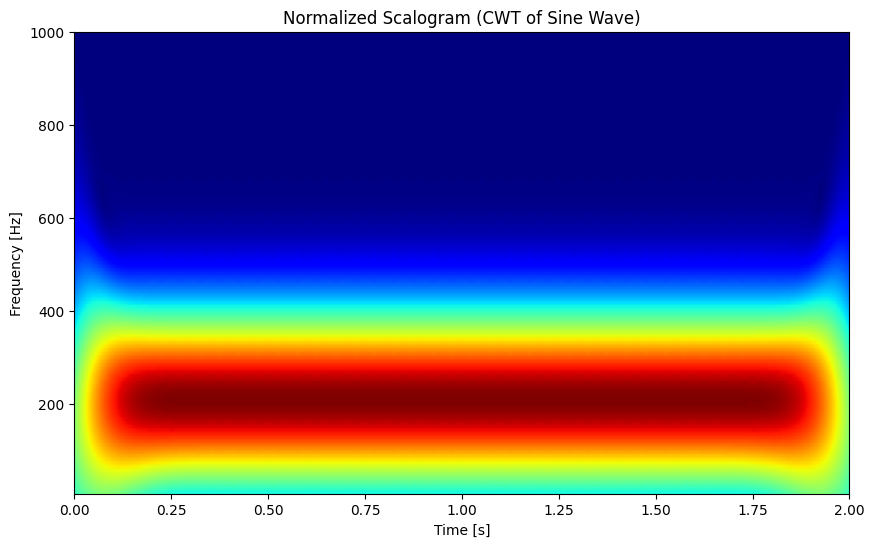

In [65]:
norm_coeffs = np.abs(coefficients) / np.max(np.abs(coefficients))
print("Normalized coefficients shape:", norm_coeffs)
plt.figure(figsize=(10, 6))
plt.imshow(norm_coeffs, extent=[0, duration, frequencies[-1], frequencies[0]],
           cmap='jet', aspect='auto')
plt.title("Normalized Scalogram (CWT of Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

In [66]:
fs = 1000
duration = 2
t = np.linspace(0, duration, fs * duration, endpoint=False)
freq = 10
signal = np.sin(2 * np.pi * freq * t)


In [67]:
wavelet = 'morl'


In [68]:
print("Frequencies shape:", frequencies.shape)
print("Closest to 10Hz:", frequencies[np.argmin(np.abs(frequencies - 10))])


Frequencies shape: (127,)
Closest to 10Hz: 10.0


In [70]:
scales = np.linspace(1, 200, 300)
print("Scales shape:", scales)

Scales shape: [  1.           1.66555184   2.33110368   2.99665552   3.66220736
   4.3277592    4.99331104   5.65886288   6.32441472   6.98996656
   7.65551839   8.32107023   8.98662207   9.65217391  10.31772575
  10.98327759  11.64882943  12.31438127  12.97993311  13.64548495
  14.31103679  14.97658863  15.64214047  16.30769231  16.97324415
  17.63879599  18.30434783  18.96989967  19.63545151  20.30100334
  20.96655518  21.63210702  22.29765886  22.9632107   23.62876254
  24.29431438  24.95986622  25.62541806  26.2909699   26.95652174
  27.62207358  28.28762542  28.95317726  29.6187291   30.28428094
  30.94983278  31.61538462  32.28093645  32.94648829  33.61204013
  34.27759197  34.94314381  35.60869565  36.27424749  36.93979933
  37.60535117  38.27090301  38.93645485  39.60200669  40.26755853
  40.93311037  41.59866221  42.26421405  42.92976589  43.59531773
  44.26086957  44.9264214   45.59197324  46.25752508  46.92307692
  47.58862876  48.2541806   48.91973244  49.58528428  50.25083

In [71]:
extent=[0, duration, frequencies[-1], frequencies[0]]


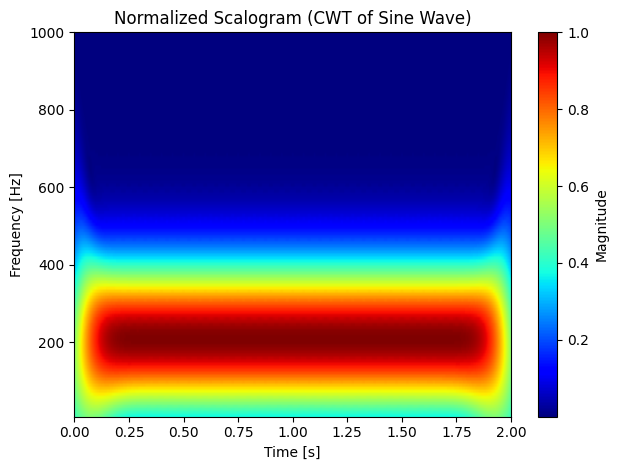

In [73]:
normalized = np.abs(coefficients) / np.max(np.abs(coefficients))
plt.imshow(normalized, extent=extent, cmap='jet', aspect='auto')
plt.title("Normalized Scalogram (CWT of Sine Wave)")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


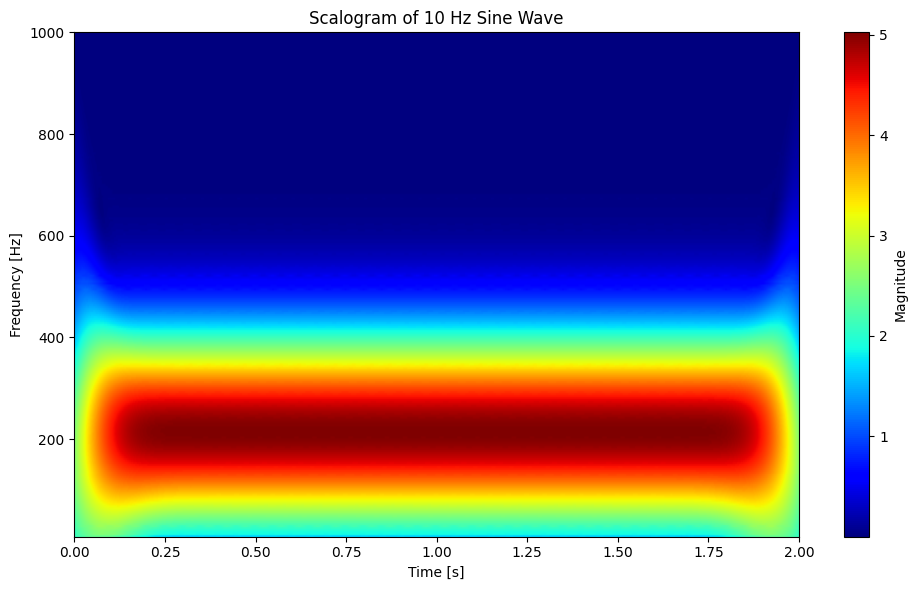

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

fs = 1000
duration = 2
t = np.linspace(0, duration, fs * duration, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t)  # 10 Hz

wavelet = 'cmor1.5-1.0'
scales = np.linspace(1, 128, 256)
coeffs, freqs = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeffs), extent=[0, duration, freqs[-1], freqs[0]],
           cmap='jet', aspect='auto')
plt.title("Scalogram of 10 Hz Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


In [94]:
max_val = np.max(np.abs(coeffs))
max_idx = np.unravel_index(np.argmax(np.abs(coeffs)), coeffs.shape)
scale_at_max = scales[max_idx[0]]
freq_at_max = freqs[max_idx[0]]
time_at_max = t[max_idx[1]]
print(f"🔴 Max magnitude = {max_val:.2f} at time = {time_at_max:.3f}s, frequency ≈ {freq_at_max:.2f} Hz")


🔴 Max magnitude = 5.02 at time = 1.267s, frequency ≈ 9.79 Hz


In [95]:
for i in [0, 50, 100, 150, 200, 255]:
    print(f"Scale: {scales[i]:.2f} → Frequency: {freqs[i]:.2f} Hz")


Scale: 1.00 → Frequency: 1000.00 Hz
Scale: 25.90 → Frequency: 38.61 Hz
Scale: 50.80 → Frequency: 19.68 Hz
Scale: 75.71 → Frequency: 13.21 Hz
Scale: 100.61 → Frequency: 9.94 Hz
Scale: 128.00 → Frequency: 7.81 Hz


In [89]:
coeffs

array([[ 6.40966880e-04-2.60739131e-03j,  6.37914625e-04-7.37622596e-03j,
         1.15519401e-04-9.66236118e-03j, ...,
         2.10060307e-05-9.74792789e-03j,  9.85926920e-06-9.85743344e-03j,
        -1.15738049e-04-9.66236118e-03j],
       [ 1.41194736e-03-3.08681957e-03j, -1.81320743e-03-1.80705911e-04j,
        -1.33540074e-04+1.71592436e-04j, ...,
        -4.42260805e-04+1.73037761e-04j,  1.14437330e-03-3.22113297e-04j,
        -2.29416883e-03-2.87244430e-03j],
       [-5.32056445e-04-3.36551087e-03j,  6.42198998e-04+2.25407951e-03j,
        -4.19959471e-04-1.02189374e-03j, ...,
         2.06661453e-04-1.02025737e-03j, -2.00208302e-04+2.25202677e-03j,
        -1.07443213e-04-3.36451914e-03j],
       ...,
       [ 1.83789234e+00-9.98642635e-01j,  1.89804038e+00-9.04352521e-01j,
         1.95578967e+00-8.06242944e-01j, ...,
        -2.03966827e+00-6.07809954e-01j, -1.99727468e+00-7.11855468e-01j,
        -1.94699875e+00-8.13091614e-01j],
       [ 1.82735084e+00-9.88217765e-01j,  1.

In [90]:
freqs.shape

(256,)

In [91]:
import numpy as np
dominant_freqs = freqs[np.argmax(np.abs(coeffs), axis=0)]


In [92]:
dominant_freqs

array([9.3386069, 9.3386069, 9.3386069, ..., 9.3386069, 9.3386069,
       9.3386069], shape=(2000,))

In [93]:
closest_idx = np.argmin(np.abs(freqs - 10))
print(f"Scale {scales[closest_idx]:.2f} corresponds to ~10 Hz")


Scale 100.11 corresponds to ~10 Hz


In [86]:
closest_idx = np.argmin(np.abs(freqs - 10))
print(f"Brightest line at Frequency: {freqs[closest_idx]:.2f} Hz")


Brightest line at Frequency: 10.01 Hz


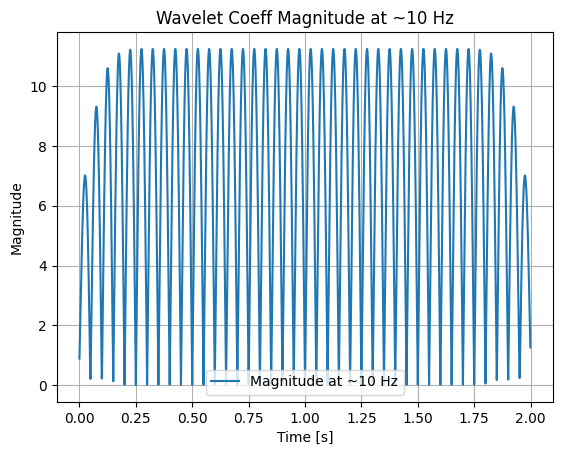

In [87]:
idx = np.argmin(np.abs(freqs - 10))
plt.plot(t, np.abs(coeffs[idx]), label="Magnitude at ~10 Hz")
plt.xlabel("Time [s]")
plt.ylabel("Magnitude")
plt.title("Wavelet Coeff Magnitude at ~10 Hz")
plt.legend()
plt.grid(True)
plt.show()


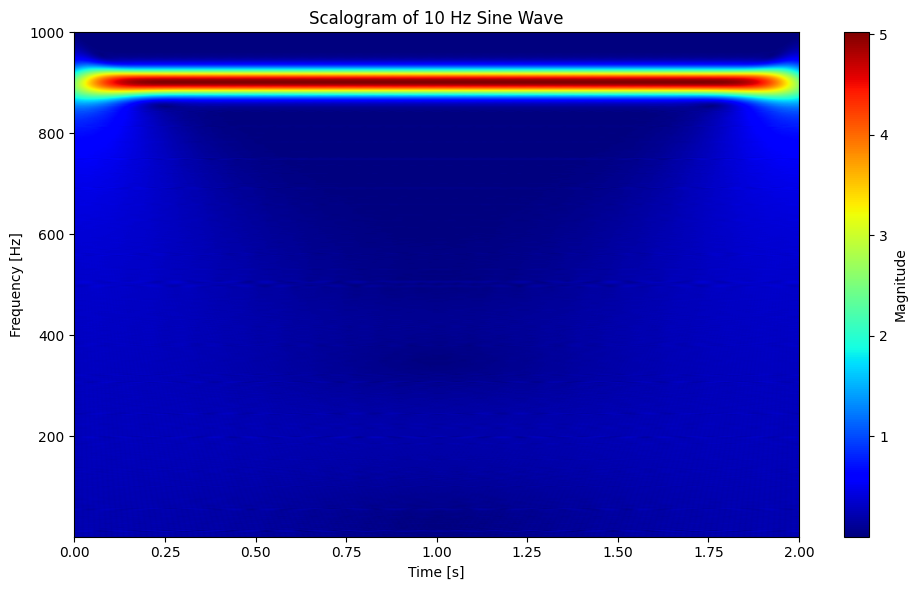

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

fs = 1000
duration = 2
t = np.linspace(0, duration, fs * duration, endpoint=False)
signal = np.sin(2 * np.pi * 10 * t)  # 10 Hz

wavelet = 'cmor1.5-1.0'
scales = np.linspace(1, 1024, 512)  # 🔧 increased to capture lower frequencies
freqs = pywt.scale2frequency(wavelet, scales) / (1/fs)  # recompute freq from scales

coeffs, _ = pywt.cwt(signal, scales, wavelet, sampling_period=1/fs)

plt.figure(figsize=(10, 6))
plt.imshow(np.abs(coeffs), extent=[0, duration, freqs[-1], freqs[0]],
           cmap='jet', aspect='auto')
plt.title("Scalogram of 10 Hz Sine Wave")
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


In [101]:
freqs

array([1.00000000e+03, 3.33116037e+02, 1.99843567e+02, 1.42737430e+02,
       1.11014556e+02, 9.08282972e+01, 7.68536622e+01, 6.66058394e+01,
       5.87694077e+01, 5.25828360e+01, 4.75747137e+01, 4.34376063e+01,
       3.99624619e+01, 3.70021723e+01, 3.44502124e+01, 3.22275479e+01,
       3.02743053e+01, 2.85442967e+01, 2.70013210e+01, 2.56166032e+01,
       2.43669830e+01, 2.32336092e+01, 2.22009819e+01, 2.12562396e+01,
       2.03886207e+01, 1.95890516e+01, 1.88498285e+01, 1.81643680e+01,
       1.75270108e+01, 1.69328650e+01, 1.63776802e+01, 1.58577458e+01,
       1.53698078e+01, 1.49110009e+01, 1.44787918e+01, 1.40709329e+01,
       1.36854227e+01, 1.33204734e+01, 1.29744827e+01, 1.26460107e+01,
       1.23337597e+01, 1.20365572e+01, 1.17533408e+01, 1.14831461e+01,
       1.12250950e+01, 1.09783870e+01, 1.07422901e+01, 1.05161343e+01,
       1.02993046e+01, 1.00912358e+01, 9.89140744e+00, 9.69933946e+00,
       9.51458841e+00, 9.33674402e+00, 9.16542608e+00, 9.00028181e+00,
      

In [106]:
pywt.scale2frequency(wavelet, 10) / (1/fs)  # recompute freq from scales

np.float64(100.0)

In [102]:
closest_idx = np.argmin(np.abs(freqs - 10))
print(f"Brightest line at Frequency: {freqs[closest_idx]:.2f} Hz")


Brightest line at Frequency: 10.09 Hz
